# Carregando dados, importando bibliotecas e fazendo ajustes no *dataset*

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('data\imoveis_aluguel_belem_vivareal.csv', sep=';')
df.head()

,Unnamed: 0,id,preco,endereco,numero,bairro,cidade,estado,area,quartos,banheiros,link
0,0,2607725937,10.000,"Travessa Dom Romualdo Coelho, 767 - Umarizal, ...",767.0,Umarizal,Belém,PA,206.0,4.0,6.0,https://www.vivareal.com.br/imovel/apartamento...
1,1,2665868797,3.900,"Avenida Gentil Bittencourt, 2113 - Sao Bras, B...",2113.0,Sao Bras,Belém,PA,74.0,3.0,2.0,https://www.vivareal.com.br/imovel/apartamento...
2,2,2665713031,4.000,Avenida Governador Magalhães Barata - Sao Bras...,NaN,Sao Bras,Belém,PA,140.0,3.0,3.0,https://www.vivareal.com.br/imovel/apartamento...
3,3,2665829698,2.515,"Rua dos Caripunas, 2742 - Cremação, Belém - PA",2742.0,Cremação,Belém,PA,86.0,2.0,3.0,https://www.vivareal.com.br/imovel/apartamento...
4,4,2665868360,5.000,"Travessa Angustura, 2806 - Marco, Belém - PA",2806.0,Marco,Belém,PA,77.0,2.0,2.0,https://www.vivareal.com.br/imovel/apartamento...


In [5]:
# Extrai o número do endereço
df["numero"] = df["endereco"].str.extract(r'(\b\d+\b)')

# Ajusta a posição da nova coluna
copia_coluna = df["numero"].copy()
df = df.drop("numero", axis=1)
df.insert(3, "numero", copia_coluna, )
df = df.drop("Unnamed: 0", axis=1)

df.head()

,id,preco,numero,endereco,bairro,cidade,estado,area,quartos,banheiros,link
0,2607725937,10.000,767,"Travessa Dom Romualdo Coelho, 767 - Umarizal, ...",Umarizal,Belém,PA,206.0,4.0,6.0,https://www.vivareal.com.br/imovel/apartamento...
1,2665868797,3.900,2113,"Avenida Gentil Bittencourt, 2113 - Sao Bras, B...",Sao Bras,Belém,PA,74.0,3.0,2.0,https://www.vivareal.com.br/imovel/apartamento...
2,2665713031,4.000,NaN,Avenida Governador Magalhães Barata - Sao Bras...,Sao Bras,Belém,PA,140.0,3.0,3.0,https://www.vivareal.com.br/imovel/apartamento...
3,2665829698,2.515,2742,"Rua dos Caripunas, 2742 - Cremação, Belém - PA",Cremação,Belém,PA,86.0,2.0,3.0,https://www.vivareal.com.br/imovel/apartamento...
4,2665868360,5.000,2806,"Travessa Angustura, 2806 - Marco, Belém - PA",Marco,Belém,PA,77.0,2.0,2.0,https://www.vivareal.com.br/imovel/apartamento...


In [6]:
df['preco'] = df['preco'].str.replace('.', '', regex=True).astype(int)


In [7]:
df['preco'].head()


0    10000
1     3900
2     4000
3     2515
4     5000
Name: preco, dtype: int32

### Utilizando quartis para remoção de outliers referentes à área do imóvel:

In [8]:
Q1_area = df['area'].quantile(0.25)
Q3_area = df['area'].quantile(0.75)

# Calcule o IQR (Intervalo Interquartil)
IQR = Q3_area - Q1_area

# Defina os limites para os outliers
limite_inferior_area = Q1_area - 1.5 * IQR
limite_superior_area = Q3_area + 1.5 * IQR

# Elimine os outliers extremos
df_sem_outliers = df[(df['area'] >= limite_inferior_area) & (df['area'] <= limite_superior_area)]
df_sem_outliers = df_sem_outliers[(df_sem_outliers['area'] <= 5000)]


### Quantos imóveis foram removidos do dataset:

In [9]:
diff = len(df['area']) - len(df_sem_outliers['area'])
print(f"Total de outliers: {diff}")


Total de outliers: 433


In [37]:
def scatterplot_reg_line(x_axis=None, y_axis=None, dataframe=None):

    sns.set(style="whitegrid")
    plt.figure(figsize=(20, 10))
    
    ax = sns.lmplot(x=x_axis, y=y_axis, data=dataframe)

    plt.xlabel(x_axis, fontsize=16)
    plt.ylabel(y_axis, fontsize=16)

    plt.show()

    correlation = dataframe[x_axis].corr(dataframe[y_axis])

    print(f"A correlação entre {x_axis} e {y_axis} é: {correlation}")
    

In [74]:
def count_plot(x_axis=None, dataframe=None):
    sns.set(style="whitegrid")
    plt.figure(figsize=(20, 10)) 

    graph = sns.countplot(x=x_axis, data=dataframe, order=dataframe[x_axis].value_counts().index, palette='Blues_r')
    for container in graph.containers:
        graph.bar_label(container)

    plt.suptitle(f"Imóveis por {x_axis}", y=1.0, fontsize=20)

    plt.xlabel(x_axis, fontsize=16)
    plt.xticks(rotation = 90)

    plt.show()

# Análise Univariada e Visualizações

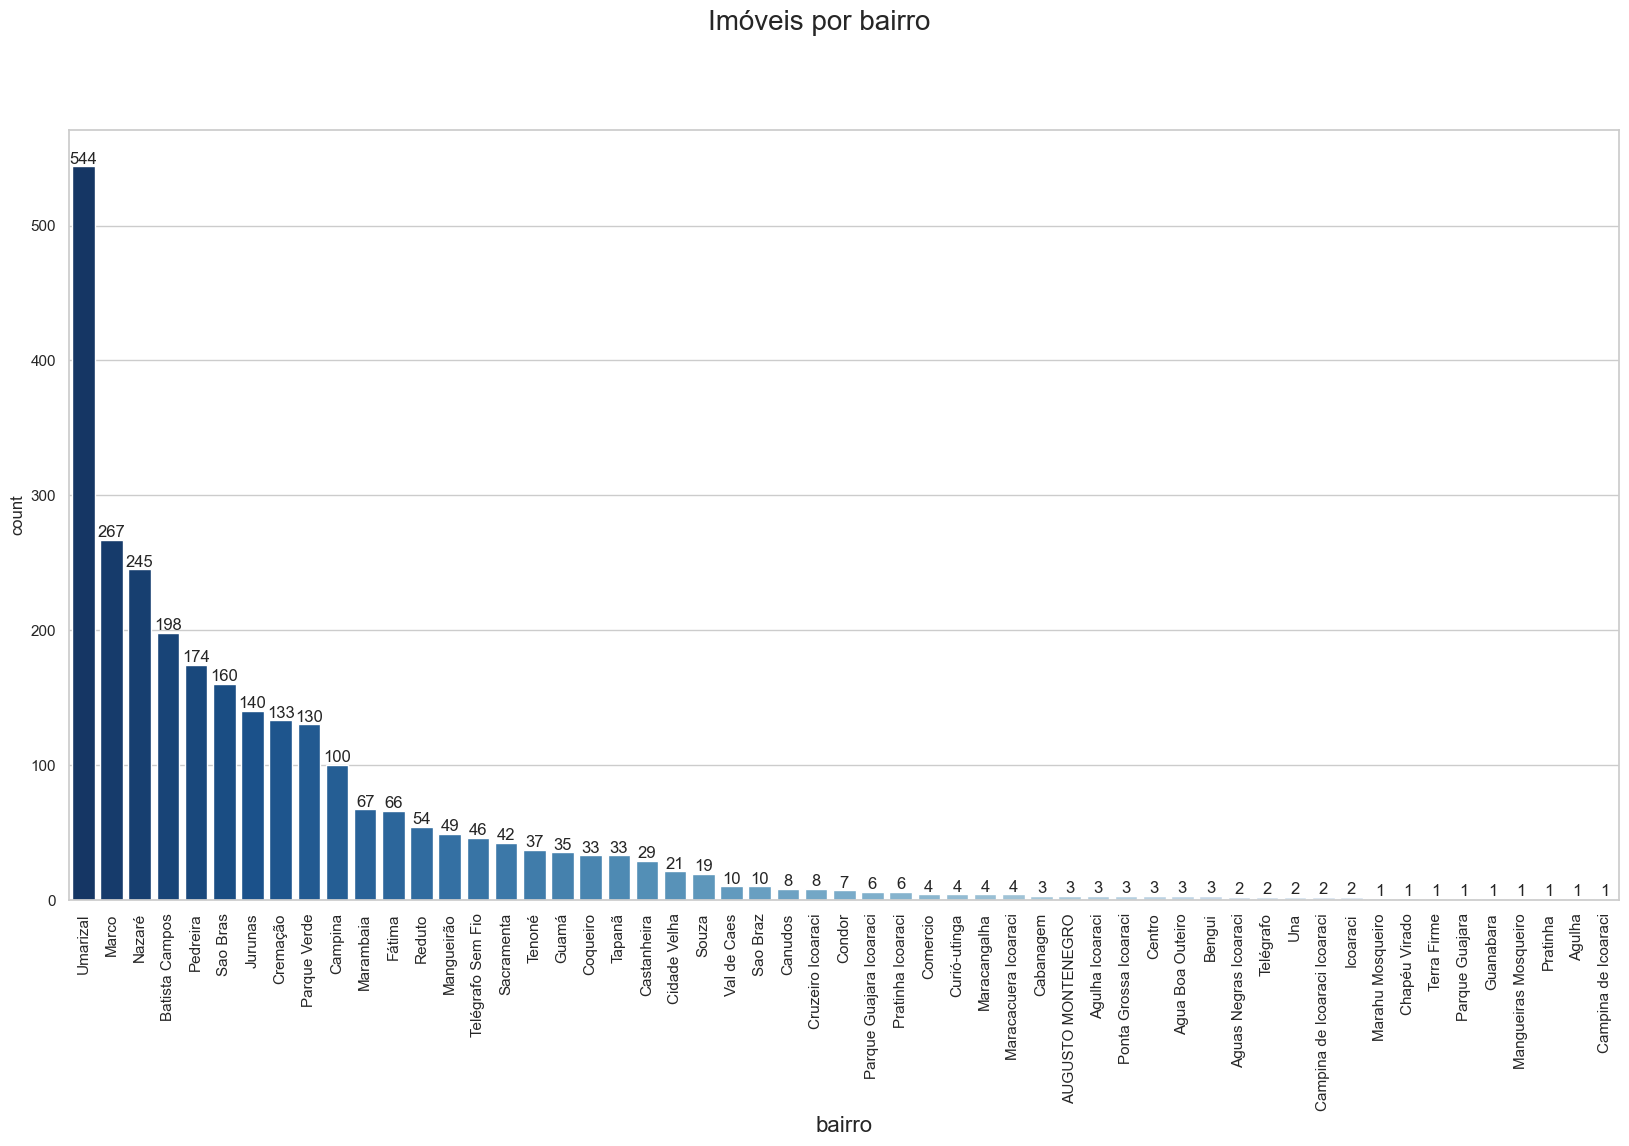

In [75]:
count_plot(x_axis='bairro', dataframe=df_sem_outliers)

Bairros com maior quantidade de imóveis cadastrados:
1. Umarizal
2. Marco
3. Nazaré
4. Batista Campos
5. Pedreira

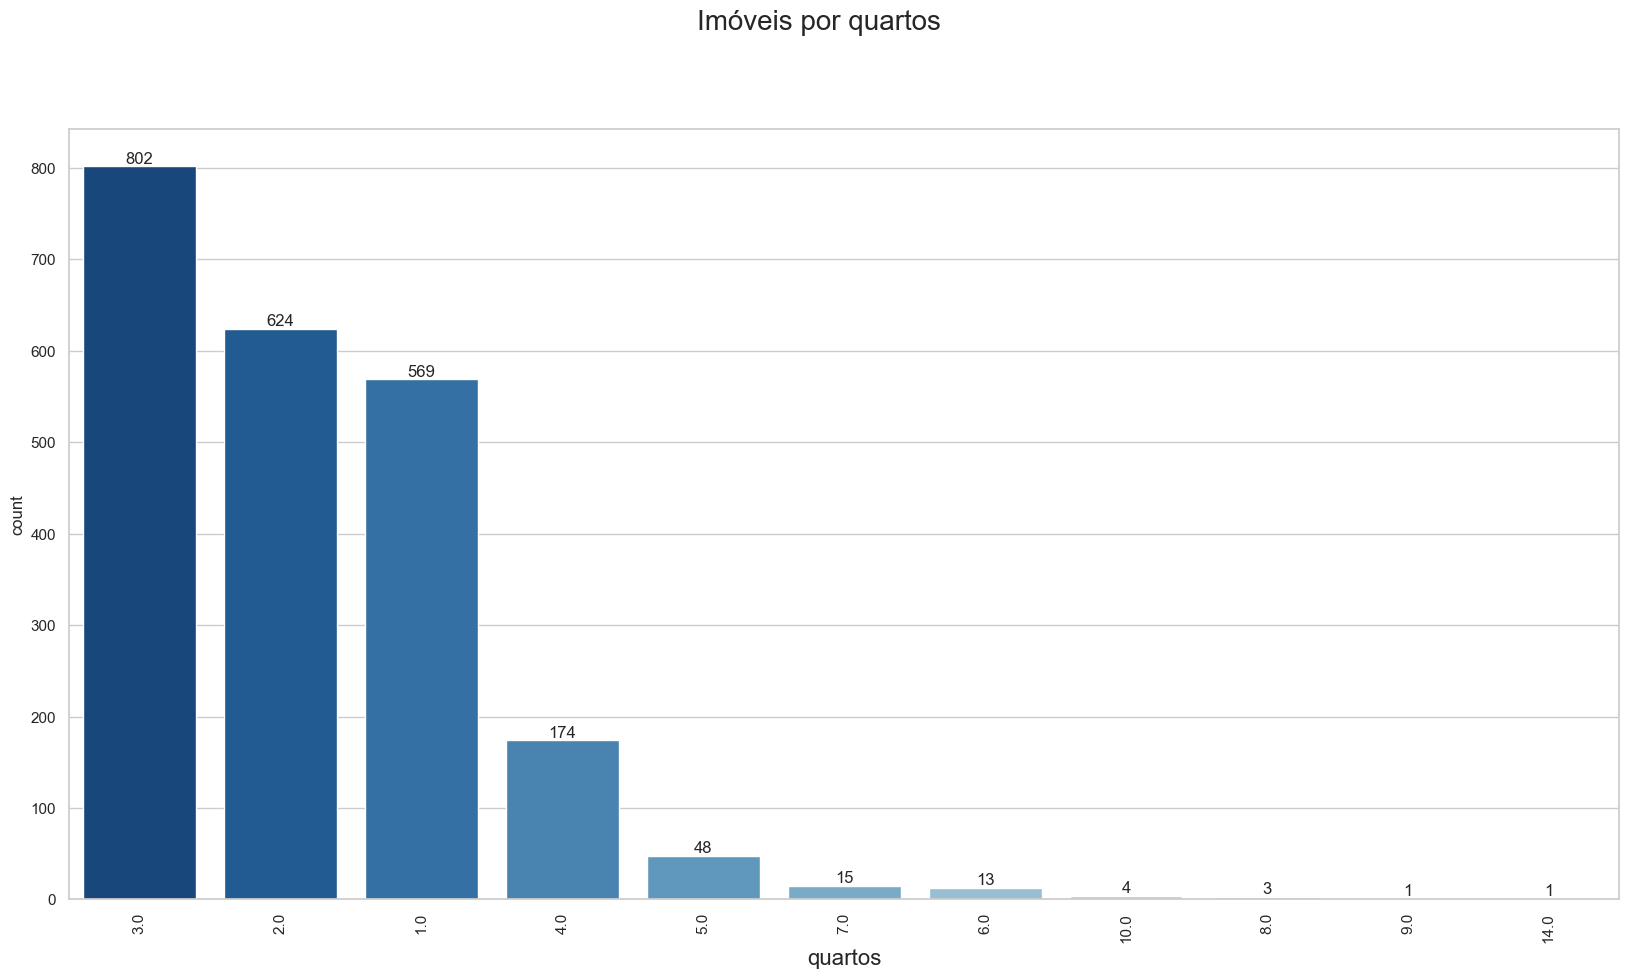

In [76]:
count_plot(x_axis='quartos', dataframe=df_sem_outliers)

Maioria dos imóveis possui 3 quartos.

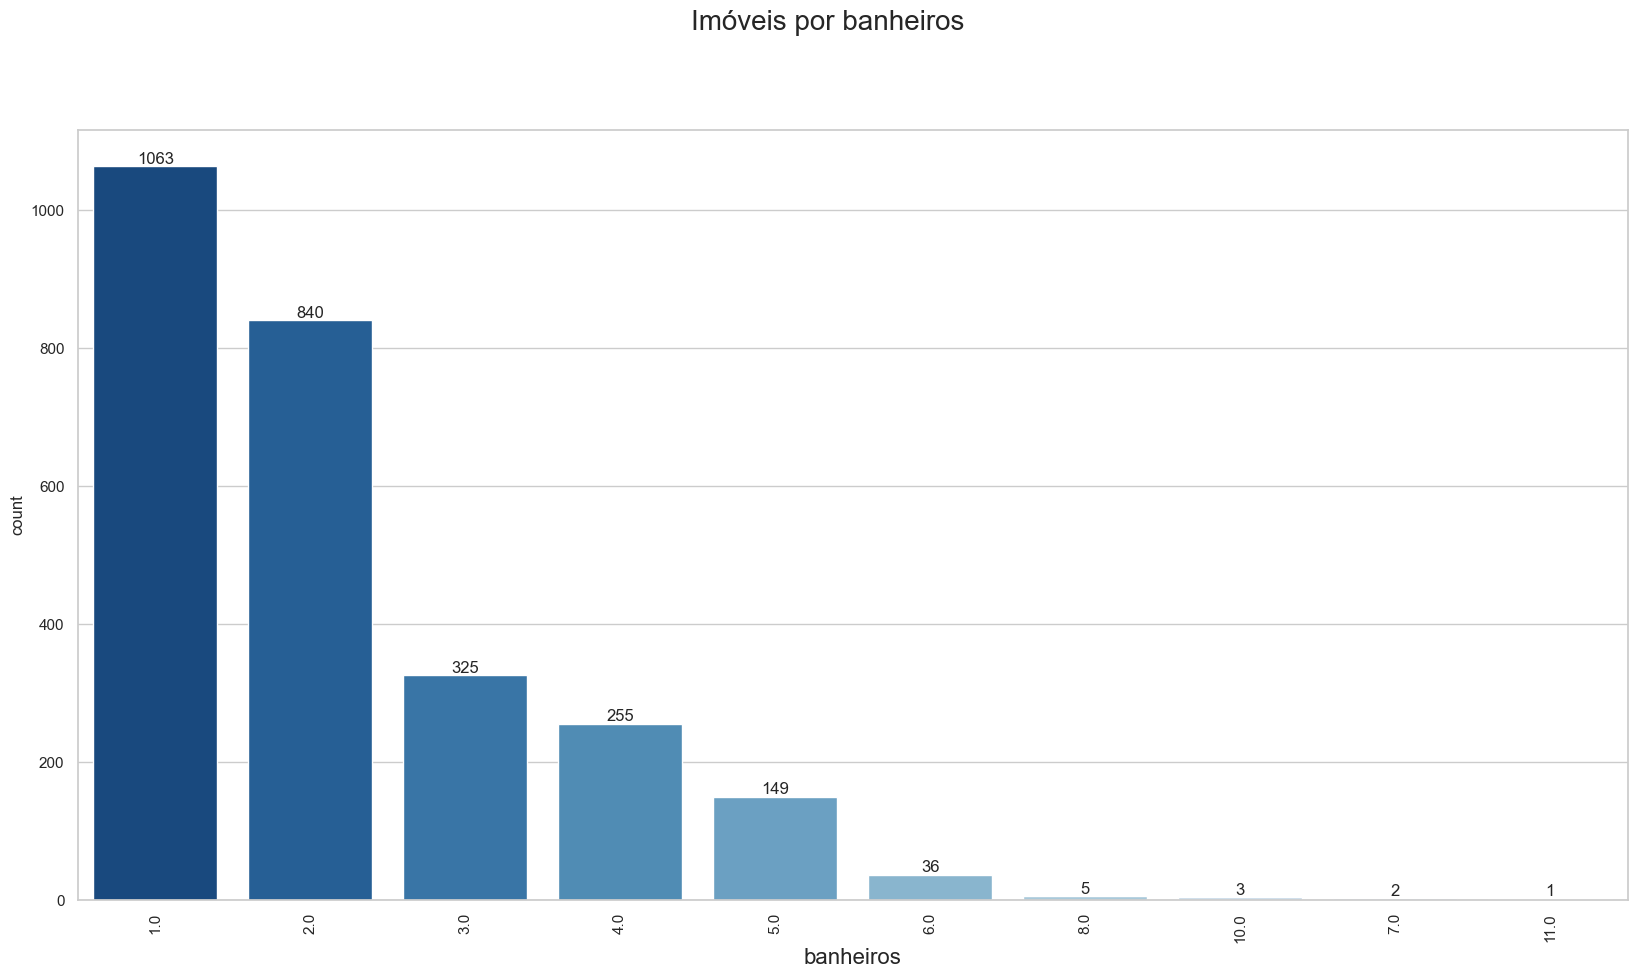

In [77]:
count_plot(x_axis='banheiros', dataframe=df_sem_outliers)

Maioria dos imóveis possui apenas um banheiro.

c:\Users\marco\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


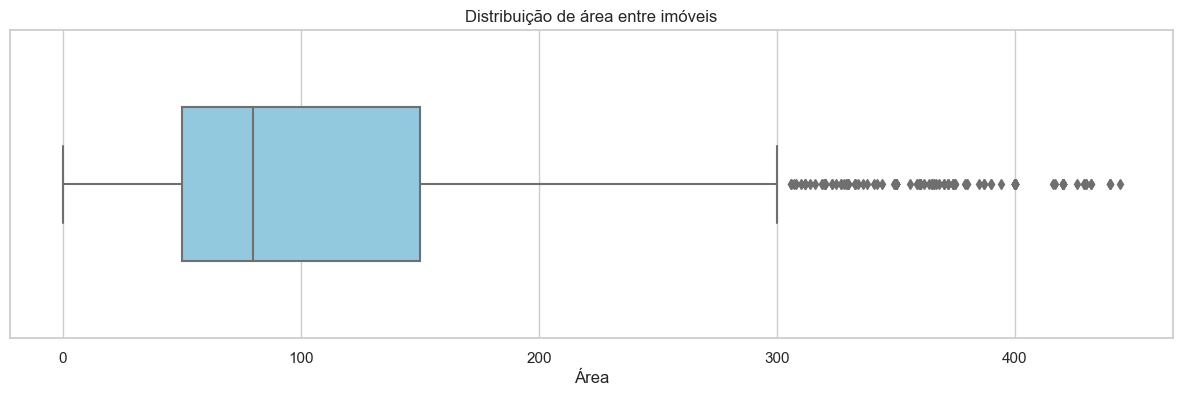

In [10]:
sns.set(style="whitegrid")  # Estilo do gráfico
plt.figure(figsize=(15, 4))  # Tamanho da figura
sns.boxplot(x=df_sem_outliers["area"], orient="v", width=0.5, color="skyblue")  # Crie o boxplot

# Adicione rótulos
plt.xlabel("Área")
plt.title("Distribuição de área entre imóveis")

# Exiba o gráfico
plt.show()


Em torno de 75% dos imóveis se concentra na faixa de até 150m² de área.

### Removendo *outliers* referentes ao preço do aluguel:

In [15]:
df_sem_outliers_p = df_sem_outliers[df_sem_outliers['preco'] <= 10000]


In [71]:
df_sem_outliers_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2740 entries, 0 to 3377
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2740 non-null   int64  
 1   preco      2740 non-null   int32  
 2   numero     2267 non-null   object 
 3   endereco   2740 non-null   object 
 4   bairro     2561 non-null   object 
 5   cidade     2561 non-null   object 
 6   estado     2561 non-null   object 
 7   area       2740 non-null   float64
 8   quartos    2181 non-null   float64
 9   banheiros  2553 non-null   float64
 10  link       2740 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(6)
memory usage: 246.2+ KB


### Quantos imóveis foram excluídos após a remoção dos *outliers* referentes ao preço do aluguel:

In [16]:
diff_p = len(df_sem_outliers['area']) - len(df_sem_outliers_p['area'])
print(f"Total de outliers: {diff_p}")

Total de outliers: 215


c:\Users\marco\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


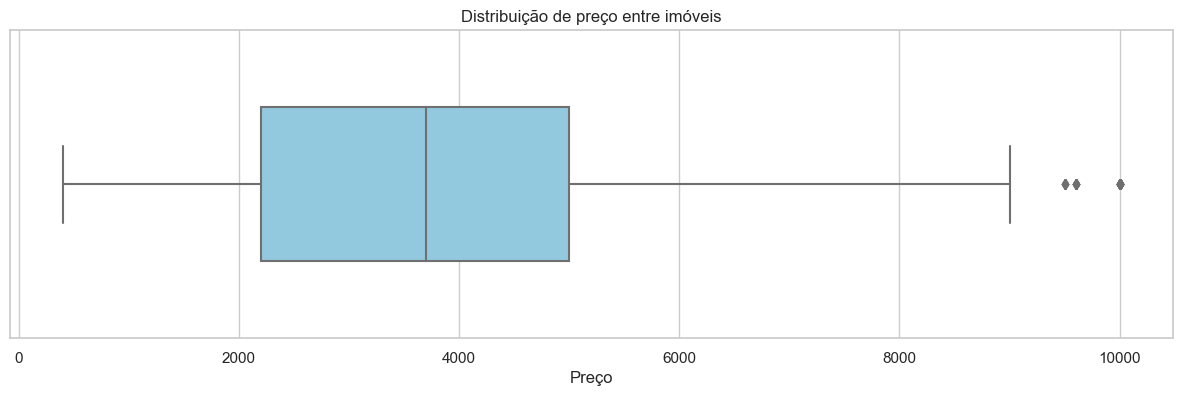

In [73]:
sns.set(style="whitegrid")  # Estilo do gráfico
plt.figure(figsize=(15, 4))  # Tamanho da figura
sns.boxplot(x=df_sem_outliers_p["preco"], orient="v", width=0.5, color="skyblue")  # Crie o boxplot

# Adicione rótulos
plt.xlabel("Preço")
plt.title("Distribuição de preço entre imóveis")

# Exiba o gráfico
plt.show()


Os preços variam bastante e em torno de 75% dos imóveis se encontra com preço abaixo dos  5 mil reais mensais.

# Análise Bivariada e Visualizações

## Área e preço

<Figure size 2000x1000 with 0 Axes>

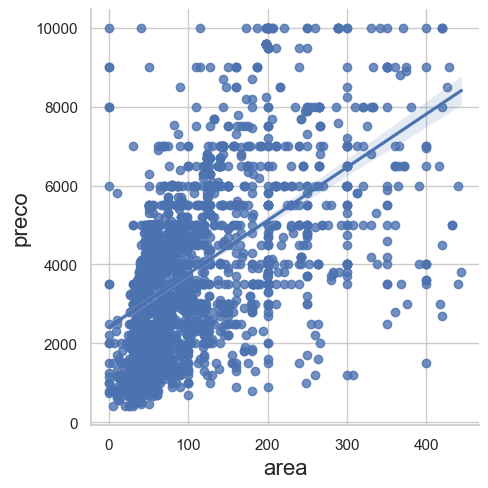

A correlação entre area e preco é: 0.5361335144606786


In [40]:
scatterplot_reg_line(x_axis='area', y_axis='preco', dataframe=df_sem_outliers_p)

## Número de banheiros e preço

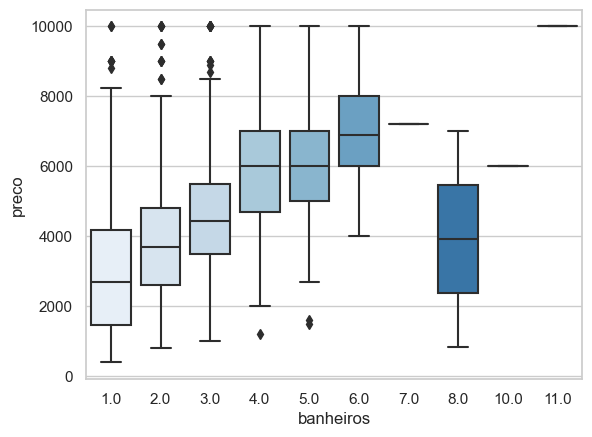

In [59]:
sns.boxplot(x ='banheiros', y ='preco', data=df_sem_outliers_p, palette='Blues')

plt.show()

## Número de quartos e preço

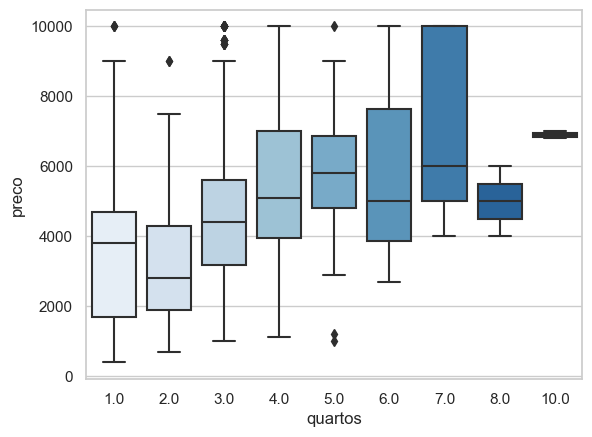

In [58]:
sns.boxplot(x ='quartos', y ='preco', data=df_sem_outliers_p, palette='Blues')

plt.show()

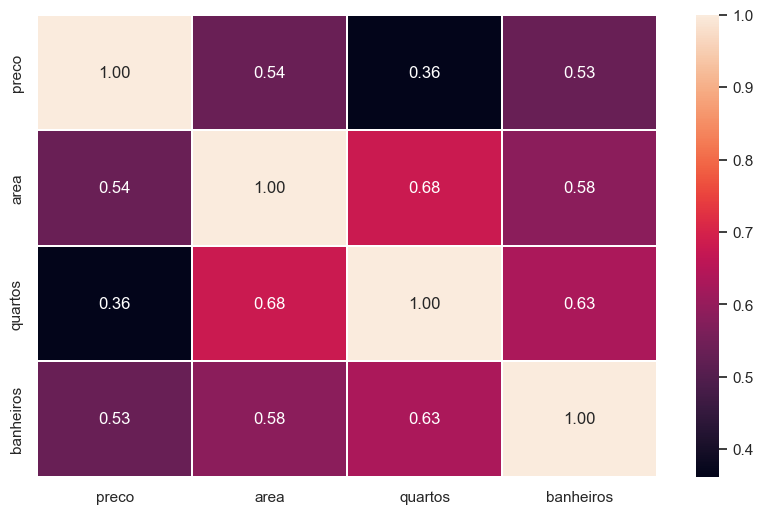

In [49]:
plt.figure(figsize = (10,6))
sns.heatmap(df_sem_outliers_p.drop('id', axis=1).select_dtypes(exclude =object).corr(), annot = True, fmt = ".2f", linewidths = 0.2)
plt.show()

A correlação linear "apenas" moderada pode indicar a interferência da localização do imóvel nos resultados, pode ser interessante fazer algumas análises mais específicas levando isso em conta para confirmar a análise.

## Bairros

Em apenas dois bairros dos cinco analisados (os cinco com maior quantidade de imóveis cadastrados), houve aumento da correlação entre área do imóvel e preço: Umarizal e Nazaré.

### Umarizal

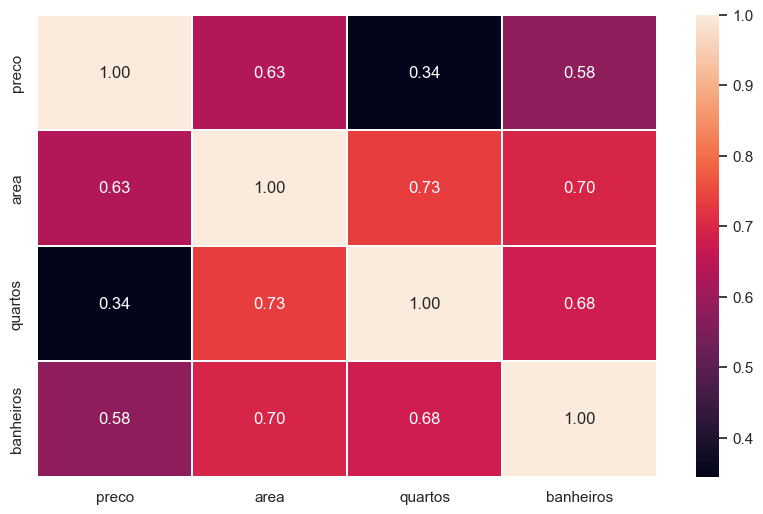

In [51]:
umarizal = df_sem_outliers_p.query('bairro == "Umarizal"')

plt.figure(figsize = (10,6))
sns.heatmap(umarizal.drop('id', axis=1).select_dtypes(exclude =object).corr(), annot = True, fmt = ".2f", linewidths = 0.2)
plt.show()

### Marco

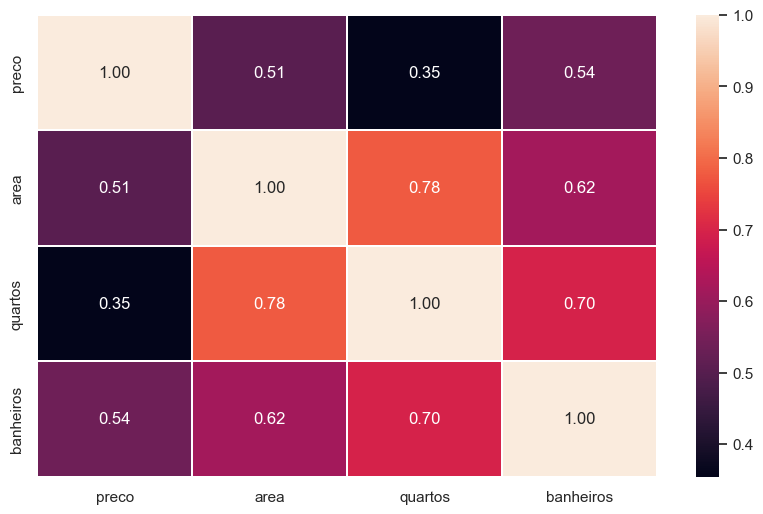

In [52]:
marco = df_sem_outliers_p.query('bairro == "Marco"')

plt.figure(figsize = (10,6))
sns.heatmap(marco.drop('id', axis=1).select_dtypes(exclude =object).corr(), annot = True, fmt = ".2f", linewidths = 0.2)
plt.show()

### Nazaré

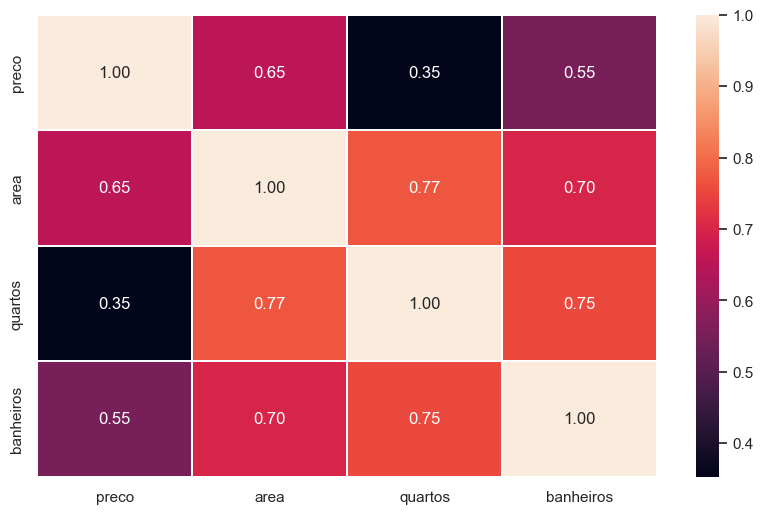

In [53]:
nazare = df_sem_outliers_p.query('bairro == "Nazaré"')

plt.figure(figsize = (10,6))
sns.heatmap(nazare.drop('id', axis=1).select_dtypes(exclude =object).corr(), annot = True, fmt = ".2f", linewidths = 0.2)
plt.show()

### Batista Campos

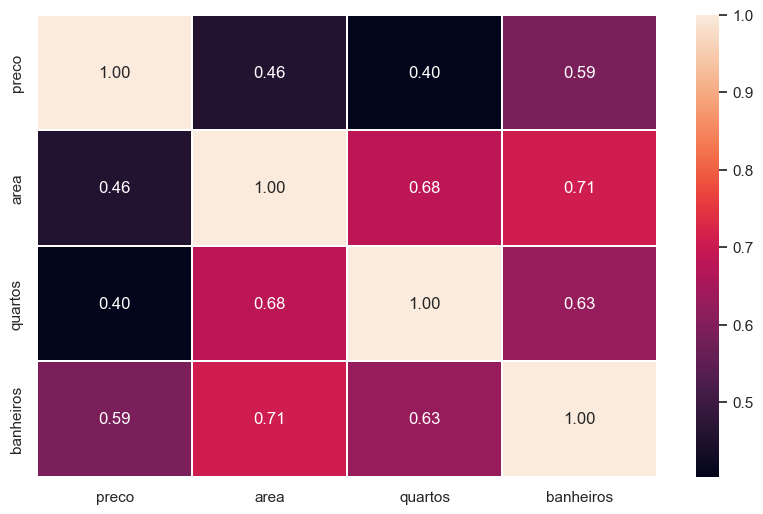

In [54]:
batista_c = df_sem_outliers_p.query('bairro == "Batista Campos"')

plt.figure(figsize = (10,6))
sns.heatmap(batista_c.drop('id', axis=1).select_dtypes(exclude =object).corr(), annot = True, fmt = ".2f", linewidths = 0.2)
plt.show()

### Pedreira

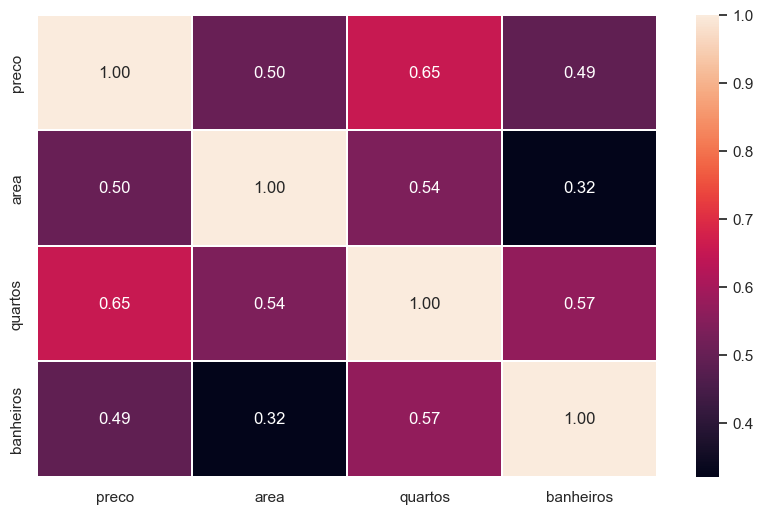

In [55]:
pedreira = df_sem_outliers_p.query('bairro == "Pedreira"')

plt.figure(figsize = (10,6))
sns.heatmap(pedreira.drop('id', axis=1).select_dtypes(exclude =object).corr(), annot = True, fmt = ".2f", linewidths = 0.2)
plt.show()